# ECON 441B- ML LAB ASSIGNMENT WEEK 5

## By- Rhea Sethi

# 1.) Import the US Perminent Visas using zip extractor

In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

In [50]:
import zipfile

zf = zipfile.ZipFile("us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/var/folders/3x/ns128h090_q4qws27889_0xc0000gn/T/ipykernel_2033/382741209.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('us_perm_visas.csv'))


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [51]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [52]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [53]:
#I choose application type, country of citizenship, 
#class of admission and employer state as the 4 features

df_select = df[["case_status", "application_type", "country_of_citizenship", "class_of_admission", "employer_state"]]

In [54]:
df_select

,case_status,application_type,country_of_citizenship,class_of_admission,employer_state
0,Certified,PERM,NaN,J-1,NY
1,Denied,PERM,NaN,B-2,NY
2,Certified,PERM,NaN,H-1B,VA
3,Certified,PERM,NaN,B-2,NY
4,Certified,PERM,NaN,L-1,NY
...,...,...,...,...,...
374357,Withdrawn,NaN,SOUTH KOREA,NaN,CA
374358,Withdrawn,NaN,VIETNAM,L-1,WA
374359,Withdrawn,NaN,INDIA,H-1B,MI
374360,Withdrawn,NaN,SOUTH KOREA,B-2,AZ


# 3.) Clean your data for a decision tree


In [56]:
#Checking for nulls

df_select.isnull().sum()

case_status                    0
application_type          239093
country_of_citizenship     20633
class_of_admission         22845
employer_state                42
dtype: int64

In [57]:
#Dropping nulls 

df_select = df_select.dropna()

In [58]:
df_select.isnull().sum()

case_status               0
application_type          0
country_of_citizenship    0
class_of_admission        0
employer_state            0
dtype: int64

In [59]:
#Creating dummies for categorical variables

X = pd.get_dummies(df_select[["class_of_admission", "application_type", 
                              "country_of_citizenship","employer_state"]])

In [60]:
X

,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_D-1,class_of_admission_E-1,class_of_admission_E-2,...,employer_state_TENNESSEE,employer_state_TEXAS,employer_state_UTAH,employer_state_VERMONT,employer_state_VIRGIN ISLANDS,employer_state_VIRGINIA,employer_state_WASHINGTON,employer_state_WEST VIRGINIA,employer_state_WISCONSIN,employer_state_WYOMING
20577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20578,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20579,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20580,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Defining target variable

y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth X


In [62]:
from sklearn import tree

In [86]:
#Fitting the decision tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [90]:
classes = y.unique()
classes

array(['Certified-Expired', 'Certified', 'Denied', 'Withdrawn'],
      dtype=object)

[Text(0.5, 0.875, 'application_type_MAILEDIN <= 0.5\ngini = 0.621\nsamples = 109114\nvalue = [47169, 46561, 8782, 6602]\nclass = Certified-Expired'),
 Text(0.25, 0.625, 'employer_state_WASHINGTON <= 0.5\ngini = 0.616\nsamples = 107715\nvalue = [47024, 46318, 7872, 6501]\nclass = Certified-Expired'),
 Text(0.125, 0.375, 'class_of_admission_EWI <= 0.5\ngini = 0.618\nsamples = 101973\nvalue = [44846, 43145, 7740, 6242]\nclass = Certified-Expired'),
 Text(0.0625, 0.125, 'gini = 0.617\nsamples = 101563\nvalue = [44750, 43014, 7577, 6222]\nclass = Certified-Expired'),
 Text(0.1875, 0.125, 'gini = 0.683\nsamples = 410\nvalue = [96, 131, 163, 20]\nclass = Denied'),
 Text(0.375, 0.375, 'class_of_admission_Not in USA <= 0.5\ngini = 0.548\nsamples = 5742\nvalue = [2178, 3173, 132, 259]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.546\nsamples = 5720\nvalue = [2175, 3169, 119, 257]\nclass = Certified'),
 Text(0.4375, 0.125, 'gini = 0.591\nsamples = 22\nvalue = [3, 4, 13, 2]\nclass = Denied

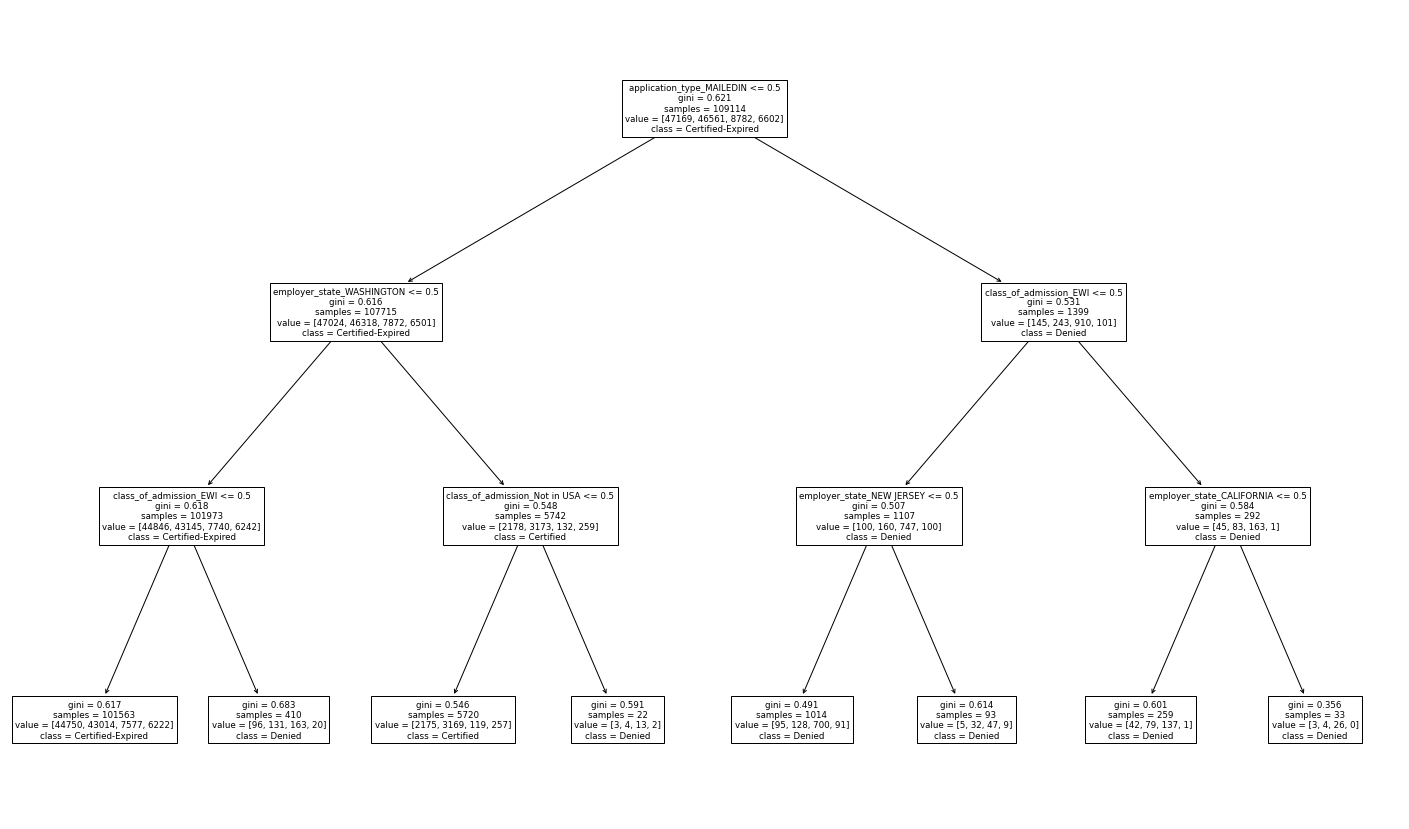

In [95]:
#Plotting the decision tree
plt.figure(figsize = (25,15))
tree.plot_tree(clf,feature_names = X.columns, class_names = classes)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node has a size of 101,563 samples. It gives the following results:
1. 44750 samples classified as "certified-expired"
2. 43014 samples classified as "certified"
3. 7577 samples classified as "denied"
4. 6222 samples classified as "withdrawn"

Since decision trees use the mode to make classifications, the predicted class for a new data point that reaches this leaf node is "certified-expired" (which is the class with the highest number of observations or the mode).

We reach this leaf node by the following this decision path-
1. For a data point, the value of "application_type_MAILED_IN" column is <= 0.5 ,i.e., O for our data since this is a dummy variable. Thus, for an applicant, the application type is not mailed in.
2. This applicant does not have their "employer state" as Washington. 
3. This applicant does not have their "class of admission" as "EWI".


An applicant satisfying the above conditions would be classified as "certified-expired".

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [78]:
max_depths = [6,7,8]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)
  y_predicted = clf.predict(X_test)  

  oos_accuracy = accuracy_score(y_test, y_predicted)
  outputs.append(oos_accuracy)

outputs

[0.4466846904641892, 0.44975484580488473, 0.4527791779315401]

For this data with a train-test split of 80%-20% the following are the accuracy results:

1. For a decision tree with maximum depth as 6, the accuracy would be ~44.66%
2. For a decision tree with maximum depth as 7, the accuracy would be ~44.97%
3. For a decision tree with maximum depth as 8, the accuracy would be ~45.27%

All the three scores are close, but max_depth = 8 has the highest accuracy relatively.